# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


*Verificando a dimensão da base de dados*

In [5]:
athletes.shape

(11538, 11)

*Verificando a existencia de valores ausentes*

In [6]:
athletes.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [7]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [8]:
# Sua análise começa aqui.

# Primeiramente iremos coletar uma amostra de tamanho 3000 das alturas dos atletas

df_altura=get_sample(athletes, "height", 3000)

In [9]:
df_altura.head()

1811     1.79
7962     1.81
10280    1.83
317      1.68
6989     2.01
Name: height, dtype: float64

**Fazendo algumas análises descritivas**

In [10]:
df_altura.describe()

count    3000.000000
mean        1.766780
std         0.112402
min         1.330000
25%         1.690000
50%         1.760000
75%         1.840000
max         2.150000
Name: height, dtype: float64

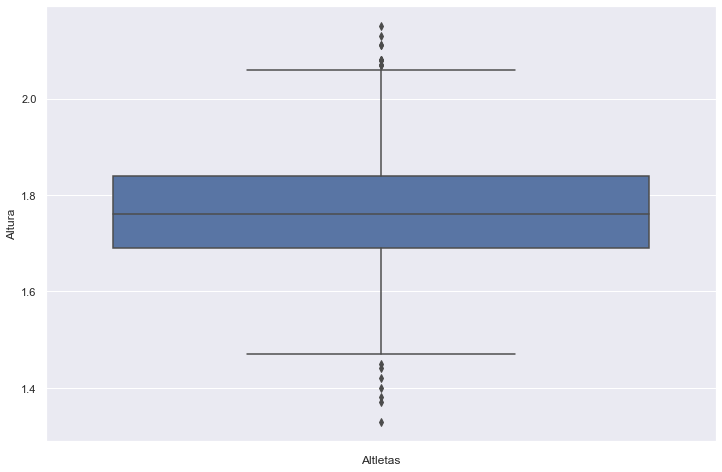

In [11]:
sns.boxplot(df_altura, orient = "v")
plt.ylabel('Altura')
plt.xlabel('Altletas');

***Observa-se como estão distribuidas as alturas dos atletas***

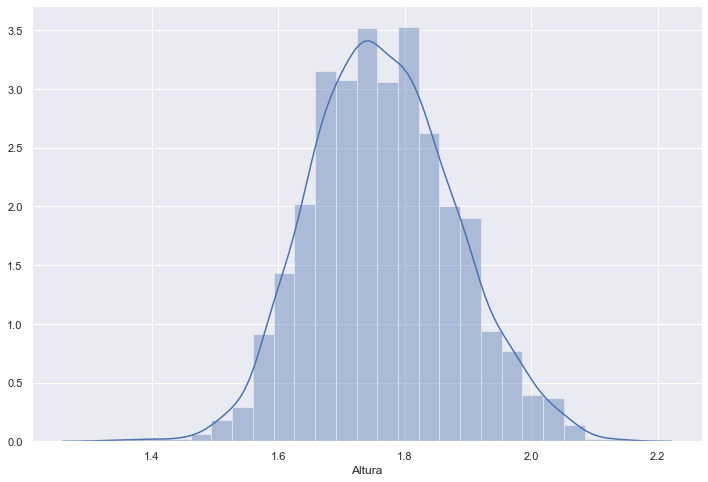

In [12]:
sns.distplot(df_altura, bins = 25)
plt.xlabel('Altura');

*Vamos verificar a distribuição acumulada empirica das alturas. Para isso, precisamos da função `ECDF` do pacote abaixo*

In [13]:
from statsmodels.distributions.empirical_distribution import ECDF

In [14]:
fda_empirica = ECDF(df_altura)

*Ao aplicar a função `fda_empirica`, vamos obter as probabilidades acumuladas das alturas*

In [15]:
probabilidades = fda_empirica(df_altura)

Vamos calcular as probabilidades teroricas com a função de distribuição acumulada Teórica. Par isso, precisamos usar a função `sct.norm.cdf`. Usaremos como parâmetros a média e o desvio padrão das alturas de todos os atletas da base de dados, ou seja, 
iremos usar a média e o desvio padrão da coluna `height` da base **athletes**

In [16]:
prob_teorica = sct.norm.cdf(df_altura, loc = athletes["height"].mean(), scale = athletes["height"].std() )

***Agora observe graficamente como a função de distribuição empirica (em laranja) está próxima da função de distribuição teórica (em azul)***

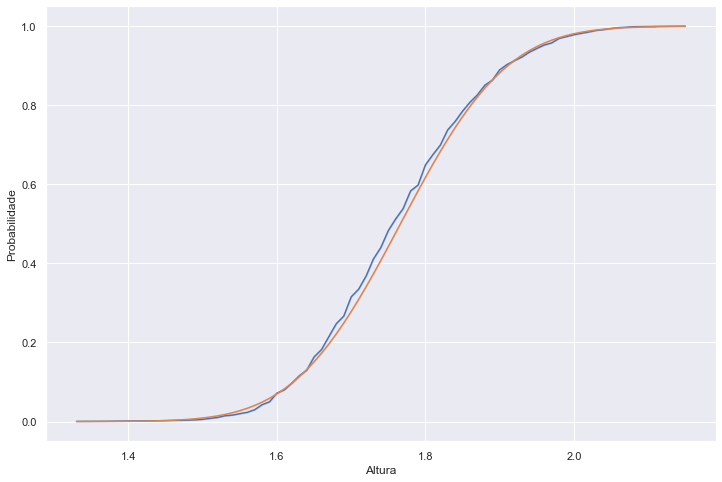

In [17]:
sns.lineplot(df_altura, probabilidades)
sns.lineplot(df_altura, prob_teorica)
plt.ylabel('Probabilidade')
plt.xlabel('Altura');

Veja que as alturas parecem ser normalmente distribuidas. Para confirmar tal suposição, iremos realizar um teste de normalidade para saber se as alturas dos atletas são normalmente distribídas. Para isso, utilizaremos inicialmente o teste de [Shapiro-Wilk](http://www.uel.br/projetos/experimental/pages/arquivos/Shapiro.html#:~:text=O%20teste%20de%20Shapiro%2DWilk,uma%20popula%C3%A7%C3%A3o%2C%20tem%20distribui%C3%A7%C3%A3o%20normal.)

 *As hipóteses que serão testadas são:*
 
 $H_{0}:$ As alturas dos atletas são provenientes de uma população Normal
 
 $H_{1}:$ As alturas dos atletas NÃO são provenientes de uma população Normal
 
        
    
   

Vamos assumir que nosso nível de significância (denotado por $\alpha$) seja de 5%, isto é, a probabilidade de cometermos o erro do tipo I (rejeirar $H_{0}$ quando $H_{0}$ é verdadeira) é 0.05.

A seguir iremos calcular a estatística de teste de Shapiro-Wilk ($W$) e seu respectivo p-valor. 

O p-valor ou valor-p, também conhecido como *nível descritivo* do teste, é uma medida de evidência em favor de $H_{0}$, isto é, ele é a probabilidade de se *observar uma estatística de teste* tão extrema quanto W , assumindo que a $H_{0}$ é verdadeira. Desta forma o p-valor vai indicar a probabilidade de comentermos o Erro do Tipo I com base na amostra, ou seja, rejeitarmos $H_{0}$ sendo ela verdadeira. Desta forma, se o p-valor for menor que o nível de significância $\alpha$, rejeitamos a hipótese nula.

**A função `sct.shapiro` nos fornece o valor da estatística W e o p-valor**

In [18]:
sct.shapiro(df_altura)

(0.9961519837379456, 5.681722541339695e-07)

In [19]:
alpha = 0.05
p_valor = sct.shapiro(df_altura)[1]

In [20]:
resultado = p_valor < alpha
print(resultado)

True


**Vamos fazer um qq-plot (gráfico quantil-quantil) para verificar o quão similar a amostra das alturas é de uma amostra proveniente de uma população normal**

Uma forma de fazer o qqplot é usando a função `probplot`

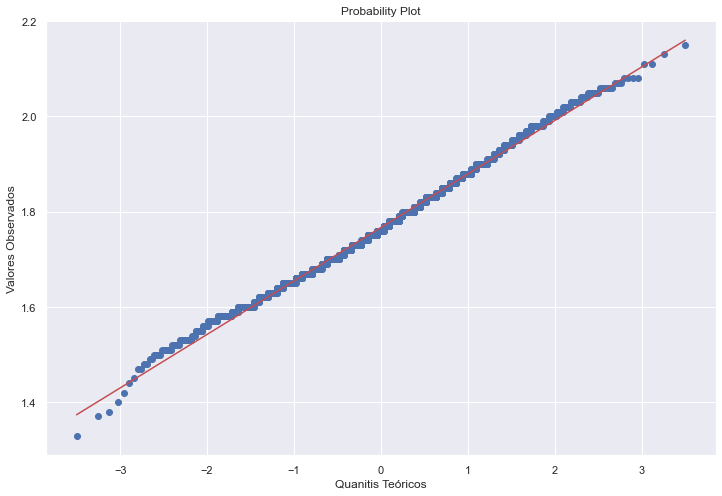

In [21]:
sct.probplot(df_altura, plot=plt)
plt.ylabel('Valores Observados')
plt.xlabel('Quanitis Teóricos');

Outra forma de fazer o qqplot é usando a funcao `qqplot` do pacote `statsmodels.api` 

In [22]:
import statsmodels.api as sm

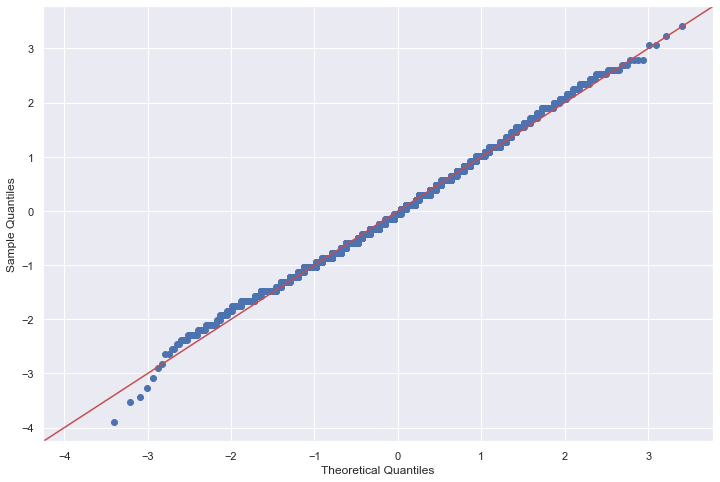

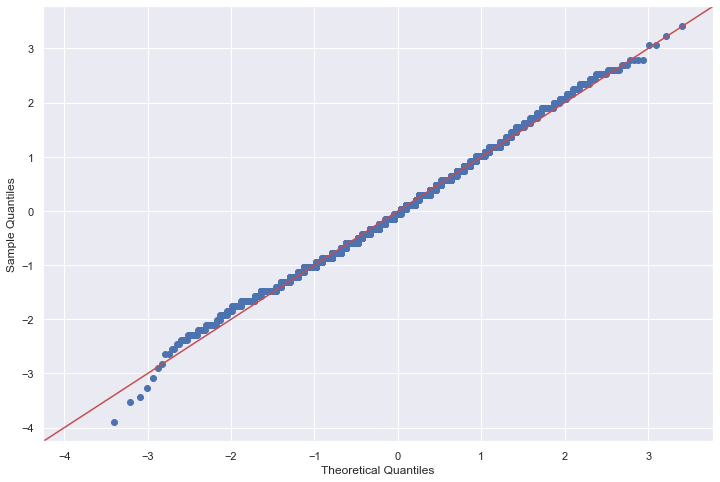

In [23]:
sm.qqplot(df_altura, fit = True, line = "45")

In [24]:
#sns.jointplot( x="quantil_teo", y="quantil_emp", data=df_aux);

Outro teste que também é usado para testar a normalidade de uma variável é o teste de [Jaque-Bera](https://docs.ufpr.br/~lucambio/CE225/2S2009/Normal_test.pdf). Sua estatística de Teste se baseia nos coeficientes de assimetria e curtose. Usaremos a função `scipy.stats.jarque_bera()` para obtermos o valor da estatistica de teste e o valor p.

Considere as hipóteses vistas anteriormente no teste de Shapiro-Wilk e o $\alpha = 0.05$

In [25]:
sct.jarque_bera(df_altura)

(13.03363513594265, 0.001478366424594868)

In [26]:
alpha = 0.05
p_valor = sct.jarque_bera(df_altura)[1]

In [27]:
resultado = p_valor < alpha

In [28]:
resultado

True

**Coletando uma amostra de tamanho 3000 dos peso dos atletas**

In [29]:
df_peso = get_sample(athletes, "weight", 3000)

In [30]:
df_peso.head(7)

2162    80.0
3450    70.0
6886    69.0
3871    66.0
6383    82.0
7345    59.0
4350    73.0
Name: weight, dtype: float64

*Verificando como os pesos estão distribuídos*

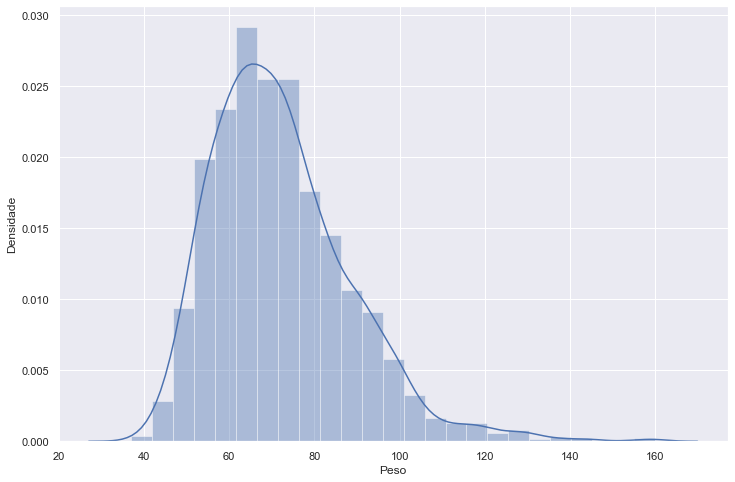

In [31]:
sns.distplot(df_peso, bins = 25)
plt.ylabel("Densidade")
plt.xlabel("Peso");

**No histograma dos pesos dos atletas observamos uma distribuição assimétrica à direita. Abaixo podemos ver o boxplot dos pesos dos atletas**

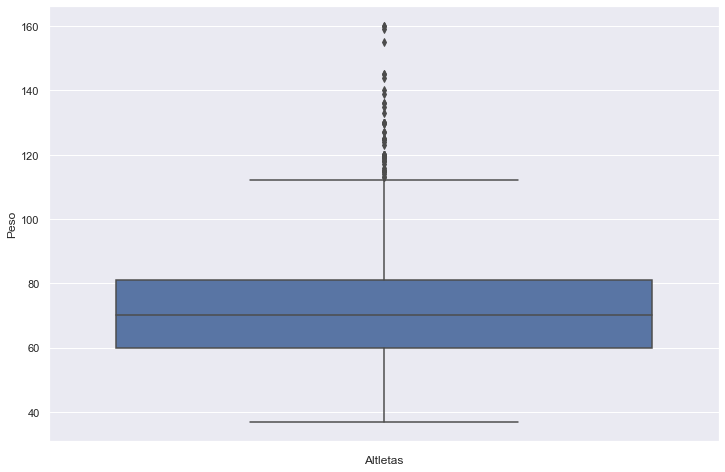

In [32]:
sns.boxplot(df_peso, orient = "v")
plt.ylabel('Peso')
plt.xlabel('Altletas');

Aqui será feito o teste de normalidade de [D'Agostino-Pearson](http://www.siseapro.com.br/testes/#V5_21) utilizando a função `scipy.stats.normaltest()`.

 *As hipóteses que serão testadas são:*
 
 $H_{0}:$ Os pesos dos atletas são provenientes de uma população Normal
 
 $H_{1}:$ Os pesos dos atletas NÃO são provenientes de uma população Normal
 
        
    
   

*Considere o nível de significancia a 5%*

In [33]:
sct.normaltest(df_peso)

NormaltestResult(statistic=510.24655809881176, pvalue=1.5898922918029537e-111)

In [34]:
alpha = 0.05
p_valor = sct.normaltest(df_peso)[1]

In [35]:
resultado = p_valor<alpha

In [36]:
# Rejeita-se a hipótese nula?
resultado

True

*Aplicando o logaritmo no peso*

In [37]:
logpeso = np.log(df_peso)

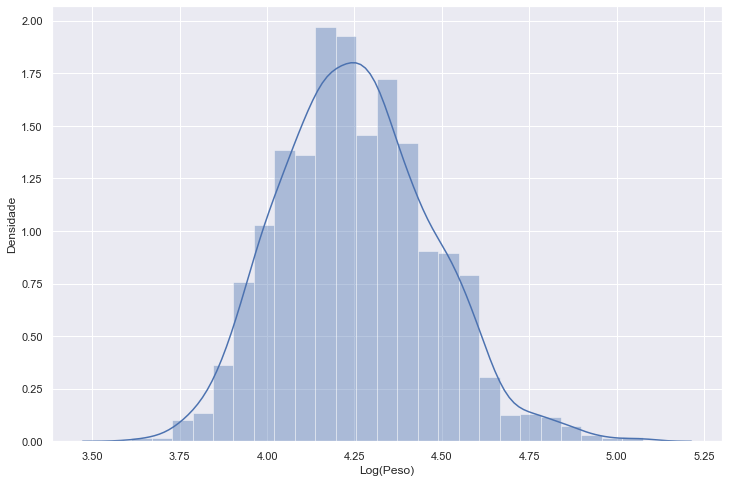

In [38]:
sns.distplot(logpeso, bins = 25)
plt.ylabel("Densidade")
plt.xlabel("Log(Peso)");

Refazendo o teste de normalidade de D'Agostino-Pearson

In [39]:
sct.normaltest(logpeso)

NormaltestResult(statistic=45.91534331977353, pvalue=1.0705572101256944e-10)

*Apartir daqui iremos trabalhar com as variáveis "nacionality" e "height" dos atletas. Iremos usar as nacionalidades de atletas do Brasil, Canadá e Estados Unidos*

In [40]:
athletes.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

*Verificando mais uma vez a existencia de valores ausentes*

In [41]:
athletes.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

*Selecionando duas variáveis (colunas) da base de dados*

In [42]:
variaveis = ["nationality", "height"]

In [43]:
aux = athletes[variaveis]

In [44]:
aux.head() 

,nationality,height
0,ESP,1.72
1,KOR,1.68
2,CAN,1.98
3,MDA,1.83
4,NZL,1.81


In [45]:
aux.shape

(11538, 2)

*Removendo os registros (linhas) ausentes*

In [46]:
aux = aux.dropna()

In [47]:
aux.shape

(11208, 2)

*Selecionando apenas os registros dos paises Brasil, Canadá e Estados unidos em seguida calcula-se algumas estatísiticas descritivas*

In [48]:
nacao = aux[ (aux["nationality"] == "BRA") | (aux["nationality"] == "CAN") | (aux["nationality"] == "USA") ]

In [49]:
nacao.groupby("nationality")["height"].agg(["mean", "median", "std"]  )

,mean,median,std
nationality,,,
BRA,1.764034,1.755,0.117388
CAN,1.758594,1.750,0.118036
USA,1.787768,1.780,0.118962


*Calculando algumas medidas descritivas com a função describe*

In [50]:
nacao.groupby("nationality")["height"].agg( "describe"  )

,count,mean,std,min,25%,50%,75%,max
nationality,,,,,,,,
BRA,476.0,1.764034,0.117388,1.33,1.68,1.755,1.84,2.11
CAN,320.0,1.758594,0.118036,1.45,1.67,1.750,1.83,2.08
USA,560.0,1.787768,0.118962,1.45,1.71,1.780,1.88,2.21


*Verificando o boxplot das alturas para cada país*

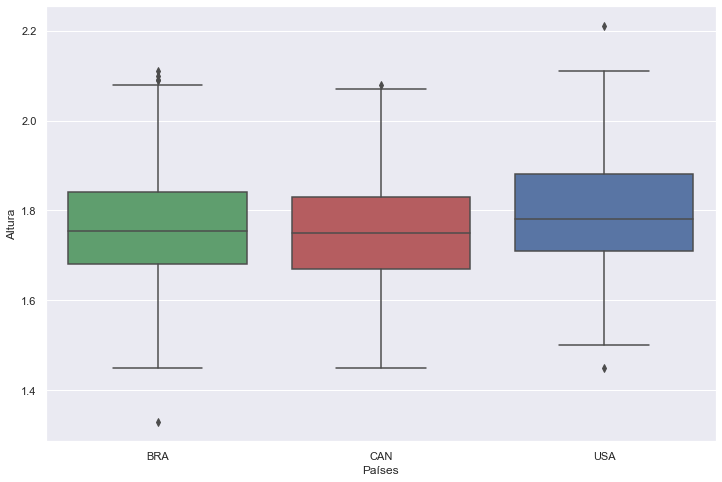

In [51]:
sns.boxplot(data = nacao, x = "nationality", y = "height", order=["BRA","CAN","USA"], palette=["g","r","b"]);
plt.ylabel("Altura")
plt.xlabel("Países");

*Verificando as distribuições das alturas de cada país*

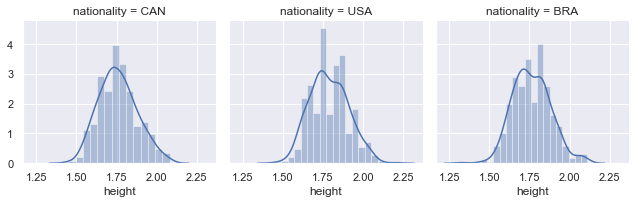

In [52]:
histograma = sns.FacetGrid(data = nacao, col = "nationality")
histograma = histograma.map(sns.distplot, "height")
plt.show()

**Selecionando atletas do Brasil**

In [53]:
bra = nacao[ nacao["nationality"] == "BRA" ]

In [54]:
bra.head()

,nationality,height
79,BRA,1.82
106,BRA,1.87
109,BRA,1.70
114,BRA,1.84
128,BRA,1.66


In [55]:
bra.shape

(476, 2)

In [56]:
sct.shapiro(bra["height"])

(0.9901964068412781, 0.0029270038940012455)

In [57]:
sct.jarque_bera(bra["height"])

(5.607275825988137, 0.060589242813389954)

In [58]:
sct.normaltest(bra["height"])

NormaltestResult(statistic=5.789168759933098, pvalue=0.05532201325418992)

**Selecionando atletas do Canadá**

In [59]:
can = nacao[ nacao["nationality"] == "CAN" ]

In [60]:
can.head()

,nationality,height
2,CAN,1.98
77,CAN,1.82
92,CAN,1.82
238,CAN,1.68
332,CAN,1.68


In [61]:
sct.shapiro(can["height"])

(0.9903658032417297, 0.03377323970198631)

In [62]:
sct.jarque_bera(can["height"])

(4.95774332399339, 0.0838377695849103)

In [63]:
sct.normaltest(can["height"])

NormaltestResult(statistic=4.955827843624166, pvalue=0.08391810284888694)

**Selecionando atletas dos Estados Unidos**

In [64]:
usa = aux[ aux["nationality"] == "USA" ]

In [65]:
usa.head()

,nationality,height
6,USA,2.05
13,USA,1.61
14,USA,1.78
64,USA,1.66
104,USA,1.73


In [66]:
sct.shapiro(usa["height"])

(0.990226686000824, 0.0008965409942902625)

In [67]:
sct.jarque_bera(usa["height"])

(6.0570872502659965, 0.04838605507140603)

In [68]:
sct.normaltest(usa["height"])

NormaltestResult(statistic=6.280491573450053, pvalue=0.04327216087209351)

Agora iremos fazer um teste de comparação de variâncias. Vamos verificar se a variabilidade das alturas dos atletas dos 3 países são iguais, para isso será realizado o Teste de [Levene](http://soniavieira.blogspot.com/2016/12/teste-de-levene-para-homocedasticia.html). Este procedimento consiste em fazer uma transformação dos dados originais e aplicar aos dados transformados o teste da ANOVA ([veja](http://www.portalaction.com.br/anova/161-teste-de-igualdade-das-variancias)). Para saber um pouco sobre a biografia de Howard Levene acesse o link [Levene](https://academic.oup.com/jhered/article/95/1/93/2187467).

Neste teste as seguintes hipóteses são:

$H_{0}: \sigma^{2}_{1}=\sigma^{2}_{2}=\cdots=\sigma^{2}_{k}$ 

$H_{1}:$ pelo menos um dos $\sigma^{2}_{i}$ é diferente dos demais. $(i=1,2,...,k)$

Em nosso caso temos k = 3 grupos que são os países.

In [69]:
sct.levene(bra["height"],can["height"],usa["height"])

LeveneResult(statistic=0.21674859884859143, pvalue=0.8051603060337438)

In [70]:
alpha = 0.05
p_valor = sct.levene(bra["height"],can["height"],usa["height"])[1]

In [71]:
resultado = p_valor<alpha

In [72]:
#rejeita-se a hipótese nula?
resultado

False

### Agora iremos fazer alguns testes de hipóteses para compara as alturas dos atletas entre os países. Vamos realizar um teste de comparação de médias para amostras independentes e com variâncias diferentes

Considere $\mu_{bra}$ e $\mu_{usa}$ as médias das alturas de atletas dos países Brasil e Estados Unidos, respectivamente.

As seguintes hipóteses serão testadas:

$H_{0}: \mu_{bra}=\mu_{usa}$

$H_{1}: \mu_{bra} \neq \mu_{usa}$

In [73]:
sct.ttest_ind(bra["height"], usa["height"], equal_var = False)

Ttest_indResult(statistic=-3.2232436467501553, pvalue=0.001308004183014406)

In [75]:
p_valor = sct.ttest_ind(bra["height"], usa["height"], equal_var=False)[1]

In [76]:
resultado = p_valor < alpha

In [77]:
#Rejeita-se a hipótese nula ?
resultado

True

*Admitindo variancias iguais*

In [78]:
sct.ttest_ind(bra["height"], usa["height"])

Ttest_indResult(statistic=-3.2197616412697903, pvalue=0.001322927779592141)

In [79]:
p_valor = sct.ttest_ind(bra["height"], usa["height"])[1]

In [80]:
resultado = p_valor < alpha

In [81]:
#Rejeita-se a hipótese nula ?
resultado

True

Considere $\mu_{bra}$ e $\mu_{can}$ as médias das alturas de atletas dos países Brasil e Canadá, respectivamente.

As seguintes hipóteses serão testadas:

$H_{0}: \mu_{bra}=\mu_{can}$

$H_{1}: \mu_{bra} \neq \mu_{can}$

In [82]:
sct.ttest_ind(bra["height"], can["height"], equal_var = False)

Ttest_indResult(statistic=0.638930491436537, pvalue=0.5230827295443041)

In [83]:
p_valor = sct.ttest_ind(bra["height"], can["height"], equal_var = False)[1]

In [84]:
resultado = p_valor < alpha

In [85]:
#Rejeita-se a hipótese nula ?
resultado

False

*Admitindo variancias iguais*

In [86]:
p_valor = sct.ttest_ind(bra["height"], can["height"])[1]

In [87]:
resultado = p_valor < alpha

In [88]:
#Rejeita-se a hipótese nula ?
resultado

False

Considere $\mu_{usa}$ e $\mu_{can}$ as médias das alturas de atletas dos países Estados Unidos e Canadá, respectivamente.

As seguintes hipóteses serão testadas:

$H_{0}: \mu_{usa}=\mu_{can}$

$H_{1}: \mu_{usa} \neq \mu_{can}$

In [89]:
sct.ttest_ind(usa["height"], can["height"], equal_var = False)

Ttest_indResult(statistic=3.516987632488539, pvalue=0.0004660129347388888)

In [90]:
p_valor = sct.ttest_ind(usa["height"], can["height"], equal_var = False)[1]

In [91]:
resultado = p_valor < alpha

In [92]:
#Rejeita-se a hipótese nula ?
resultado

True

In [93]:
p_valor = round(p_valor, 8)

In [94]:
p_valor

0.00046601

*Admitindo variancias iguais*

In [95]:
p_valor = sct.ttest_ind(usa["height"], can["height"])[1]

In [96]:
resultado = p_valor < alpha

In [97]:
#Rejeita-se a hipótese nula ?
resultado

True

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [ ]:
df_altura=get_sample(athletes, "height", 3000)

In [ ]:
def q1():
    # Retorne aqui o resultado da questão 1.
    alpha = 0.05
    p_valor = sct.shapiro(df_altura)[1]
    resultado = p_valor < alpha
    if(resultado):
        altura_norm = False
    else:
        altura_norm = resultado
    return altura_norm

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [ ]:
def q2():
    # Retorne aqui o resultado da questão 2.
    alpha = 0.05
    p_valor = sct.jarque_bera(df_altura)[1]
    resultado = p_valor < alpha
    if(resultado):
        altura_norm = False
    else:
        altura_norm = resultado
    return altura_norm

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [ ]:
df_peso = get_sample(athletes, "weight", 3000)

In [ ]:
def q3():
    # Retorne aqui o resultado da questão 3.
    alpha = 0.05
    p_valor = sct.normaltest(df_peso)[1]
    resultado = p_valor < alpha
    if(resultado):
        peso_norm = False
    else:
        peso_norm = resultado
    return peso_norm

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [ ]:
def q4():
    # Retorne aqui o resultado da questão 4.
    logpeso = np.log(df_peso)
    alpha = 0.05
    p_valor = sct.normaltest(logpeso)[1]
    resultado = p_valor < alpha
    if(resultado):
        logpeso_norm = False
    else:
        logpeso_norm = resultado
    return logpeso_norm

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [ ]:
athletes.isna().sum()

In [ ]:
variaveis = ["nationality", "height"]

In [ ]:
aux = athletes[variaveis]

In [ ]:
aux = aux.dropna()

In [ ]:
nacao = aux[ (aux["nationality"] == "BRA") | (aux["nationality"] == "CAN") | (aux["nationality"] == "USA") ]

In [ ]:
bra = nacao[ nacao["nationality"] == "BRA" ]

In [ ]:
can = nacao[ nacao["nationality"] == "CAN" ]

In [ ]:
usa = aux[ aux["nationality"] == "USA" ]

In [ ]:
alpha = 0.05

In [ ]:
def q5():
    # Retorne aqui o resultado da questão 5.
    p_valor = sct.ttest_ind(bra["height"], usa["height"], equal_var=False)[1]
    resultado = p_valor < alpha
    if(resultado):
        afirmacao = False
    else:
        afirmacao = resultado
    return afirmacao    

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [ ]:
def q6():
    # Retorne aqui o resultado da questão 6.
    p_valor = sct.ttest_ind(bra["height"], can["height"], equal_var=False)[1]
    resultado = p_valor < alpha
    if(resultado):
        afirmacao = resultado
    else:
        afirmacao = True
    return afirmacao        


## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [ ]:
def q7():
    # Retorne aqui o resultado da questão 7.
    p_valor = sct.ttest_ind(usa["height"], can["height"], equal_var=False)[1]
    resultado = p_valor < alpha
    if(resultado):
        afirmacao = resultado
    else:
        afirmacao = False
    return round(p_valor, 8)        

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?